<a href="https://colab.research.google.com/github/Ranjankraj/Shala/blob/main/ML_L9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

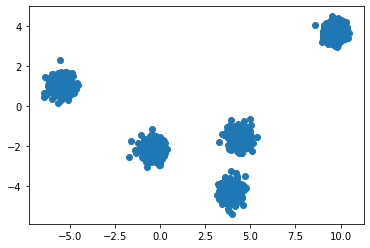

In [2]:
X, y = make_blobs(n_samples=1000, centers=5, cluster_std=.35, random_state=123)

X_train, X_new = train_test_split(X, test_size=0.01)

plt.scatter(X_train[:, 0], X_train[:,1])
plt.show()

In [7]:
clusters = 4
kmeans = KMeans(n_clusters=clusters)

y_pred = kmeans.fit_predict(X_train)

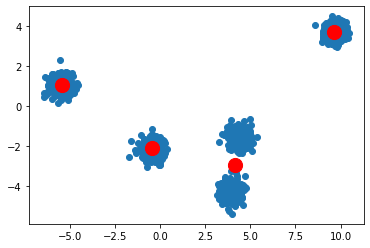

In [8]:
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='red')
plt.show()

In [9]:
y_pred[:20]

array([2, 0, 3, 0, 0, 1, 0, 0, 1, 3, 2, 3, 1, 0, 2, 3, 1, 0, 3, 1],
      dtype=int32)

In [10]:
kmeans.inertia_

1008.6559084798537

In [11]:
kmeans.cluster_centers_

array([[-0.43652711, -2.13166928],
       [ 9.64567577,  3.69734956],
       [-5.47526274,  1.04643951],
       [ 4.15980534, -2.93435595]])

In [12]:
kmeans.predict(X_new)

array([1, 2, 0, 2, 0, 3, 1, 1, 2, 3], dtype=int32)

In [13]:
kmeans.transform(X_new)

array([[12.01289873,  0.3714535 , 15.67694382,  8.97120364],
       [ 6.45217954, 15.73929374,  0.49556335, 10.91736607],
       [ 0.17907021, 11.67593735,  6.10137769,  4.57696462],
       [ 5.78717819, 15.40066844,  0.3162416 , 10.3002555 ],
       [ 0.27078735, 11.69522417,  5.70020541,  4.87576522],
       [ 4.63270067,  9.47160196, 10.54272548,  0.92567137],
       [11.79835159,  0.15260606, 15.4920211 ,  8.75242863],
       [11.34279043,  0.32327398, 15.10581061,  8.28337393],
       [ 6.23189584, 15.27645151,  0.48697436, 10.6218586 ],
       [ 5.21997198,  9.4631612 , 11.14010049,  1.24477191]])

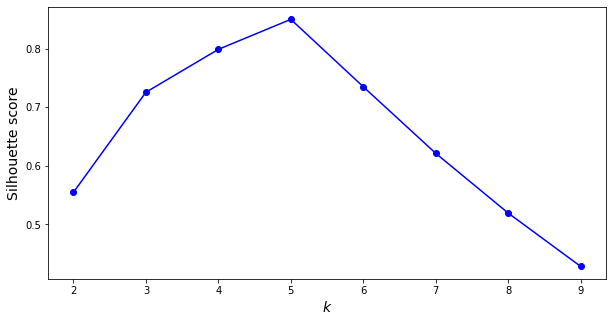

In [16]:
from sklearn.metrics import silhouette_score
kmeans_models = [KMeans(n_clusters=k, random_state=123).fit(X) for k in range(1,10)]

silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_models[1:]]

plt.figure(figsize=(10,5))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel('$k$', fontsize=14)
plt.ylabel('Silhouette score', fontsize=14)
plt.show()

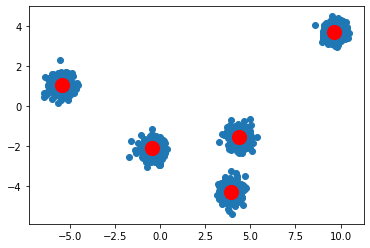

In [17]:
kmeans = KMeans(n_clusters=5)

y_pred = kmeans.fit_predict(X_train)

plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red')
plt.show()